In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from collections import Counter
from keras import models
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

/home/hamza/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#CNN Architecture
model = models.Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))
model.load_weights('facial_expression_model_weights.h5')

In [3]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    return objects[np.argmax(emotions)]

In [4]:
def extract_faces_from_video(video_path):
    vidcap = cv2.VideoCapture(video_path)
    success,image = vidcap.read()
    count = 0
    success = True
    face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')
    extracted_faces = []
    while success:
        if count % 10 == 0:
            faces = face_cascade.detectMultiScale(image, 1.3, 5)
            for (x,y,w,h) in faces:
                extracted_faces.append(cv2.cvtColor(image[y:y+h, x:x+w], cv2.COLOR_BGR2GRAY))          
        success, image = vidcap.read()  
        count +=1
        
    return extracted_faces

# Insert the video path in the 'extract_faces_from_video' function below

In [5]:
faces = extract_faces_from_video('hum_video.mp4')
print('Total faces extracted from video: ', len(faces))
print()

Total faces extracted from video:  126



/home/hamza/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """


Counter({'neutral': 44, 'angry': 42, 'happy': 18, 'surprise': 9, 'fear': 7, 'sad': 6})


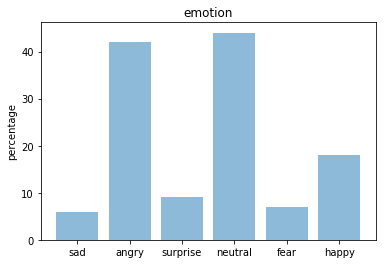

In [6]:
emotions = []
for face in faces:
    face = cv2.resize(face, (48,48))
    face = np.expand_dims(face, axis = 0)
    face = np.expand_dims(face, axis = 4)
    emotion = model.predict(face)
    emotions.append(emotion_analysis(emotion[0]))
print( Counter(emotions))
    
freq = dict(Counter(emotions))
labels = freq.keys()
counts = freq.values()
total = np.arange(len(labels))
    
plt.bar(total, counts, align='center', alpha=0.5)
plt.xticks(total, labels)
plt.ylabel('percentage')
plt.title('emotion')
plt.show()